# Image features exercise
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](http://vision.stanford.edu/teaching/cs231n/assignments.html) on the course website.*

We have seen that we can achieve reasonable performance on an image classification task by training a linear classifier on the pixels of the input image. In this exercise we will show that we can improve our classification performance by training linear classifiers not on raw pixels but on features that are computed from the raw pixels.

All of your work for this exercise will be done in this notebook.

In [1]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Load data
Similar to previous exercises, we will load CIFAR-10 data from disk.

In [2]:
from cs231n.features import color_histogram_hsv, hog_feature

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
  # Load the raw CIFAR-10 data
  cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
  X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
  
  # Subsample the data
  mask = range(num_training, num_training + num_validation)
  X_val = X_train[mask]
  y_val = y_train[mask]
  mask = range(num_training)
  X_train = X_train[mask]
  y_train = y_train[mask]
  mask = range(num_test)
  X_test = X_test[mask]
  y_test = y_test[mask]

  return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

## Extract Features
For each image we will compute a Histogram of Oriented
Gradients (HOG) as well as a color histogram using the hue channel in HSV
color space. We form our final feature vector for each image by concatenating
the HOG and color histogram feature vectors.

Roughly speaking, HOG should capture the texture of the image while ignoring
color information, and the color histogram represents the color of the input
image while ignoring texture. As a result, we expect that using both together
ought to work better than using either alone. Verifying this assumption would
be a good thing to try for the bonus section.

The `hog_feature` and `color_histogram_hsv` functions both operate on a single
image and return a feature vector for that image. The extract_features
function takes a set of images and a list of feature functions and evaluates
each feature function on each image, storing the results in a matrix where
each column is the concatenation of all feature vectors for a single image.

In [3]:
from cs231n.features import *

num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

## Train SVM on features
Using the multiclass SVM code developed earlier in the assignment, train SVMs on top of the features extracted above; this should achieve better results than training SVMs directly on top of raw pixels.

In [4]:
# Use the validation set to tune the learning rate and regularization strength

from cs231n.classifiers.linear_classifier import LinearSVM
import time

learning_rates = [1e-9, 1e-8, 1e-7]
regularization_strengths = [1e5, 1e6, 1e7]

results = {}
best_val = -1
best_svm = None

pass
################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################
#for lr in learning_rates:
#    for reg in regularization_strengths:
n_runs = 10
lr_ranges_exp = [-9, -7]
reg_ranges_exp = [5,7]
for run in xrange(n_runs):
    
        lr = 10**np.random.uniform(*lr_ranges_exp)
        reg = 10**np.random.uniform(*reg_ranges_exp)
        svm = LinearSVM()
        tic = time.time()
        loss_hist = svm.train(X_train_feats, y_train, learning_rate=lr, reg=reg,
                      num_iters=1500, verbose=True)
        toc = time.time()
        print "LR: {}  Reg: {}".format(lr, reg)
        print 'That took %fs' % (toc - tic)
        y_train_pred = svm.predict(X_train_feats)
        print 'training accuracy: %f' % np.mean(y_train == y_train_pred)
        y_val_pred = svm.predict(X_val_feats)
        val_acc = np.mean(y_val == y_val_pred)
        print 'validation accuracy: ', val_acc
        results[(lr, reg)] = (np.mean(y_train == y_train_pred), (np.mean(y_val == y_val_pred)))
        if best_val < val_acc:
            best_val = val_acc
            best_svm = svm
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print 'lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy)
    
print 'best validation accuracy achieved during cross-validation: %f' % best_val

iteration 0 / 1500: loss 473.023709
iteration 100 / 1500: loss 291.514122
iteration 200 / 1500: loss 180.999372
iteration 300 / 1500: loss 113.729299
iteration 400 / 1500: loss 72.758726
iteration 500 / 1500: loss 47.821853
iteration 600 / 1500: loss 32.635349
iteration 700 / 1500: loss 23.388588
iteration 800 / 1500: loss 17.762303
iteration 900 / 1500: loss 14.334627
iteration 1000 / 1500: loss 12.247256
iteration 1100 / 1500: loss 10.977279
iteration 1200 / 1500: loss 10.203638
iteration 1300 / 1500: loss 9.733025
iteration 1400 / 1500: loss 9.446367
LR: 4.08091564959e-09  Reg: 607197.199043
That took 8.529135s
training accuracy: 0.096898
validation accuracy:  0.106
iteration 0 / 1500: loss 176.344363
iteration 100 / 1500: loss 83.024660
iteration 200 / 1500: loss 41.735222
iteration 300 / 1500: loss 23.481157
iteration 400 / 1500: loss 15.406763
iteration 500 / 1500: loss 11.834338
iteration 600 / 1500: loss 10.253154
iteration 700 / 1500: loss 9.554137
iteration 800 / 1500: loss 9

In [5]:
# Evaluate your trained SVM on the test set
y_test_pred = best_svm.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print test_accuracy

0.424


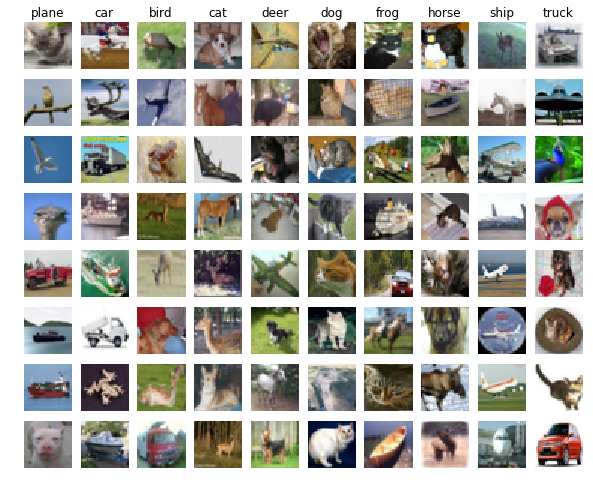

In [6]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".

examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

## Neural Network on image features
Earlier in this assigment we saw that training a two-layer neural network on raw pixels achieved better classification performance than linear classifiers on raw pixels. In this notebook we have seen that linear classifiers on image features outperform linear classifiers on raw pixels. 

For completeness, we should also try training a neural network on image features. This approach should outperform all previous approaches: you should easily be able to achieve over 55% classification accuracy on the test set; our best model achieves about 60% classification accuracy.

In [7]:
# Plot the loss function and train / validation accuracies
def show_stats_history(stats):
    plt.figure()
    plt.subplot(2, 1, 1)
    plt.plot(stats['loss_history'])
    plt.title('Loss history')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.subplot(2, 1, 2)
    plt.plot(stats['train_acc_history'], label='train')
    plt.plot(stats['val_acc_history'], label='val')
    plt.title('Classification accuracy history')
    plt.xlabel('Epoch')
    plt.ylabel('Clasification accuracy')
    plt.legend()
    plt.show()
    
def eval_acc(net, X,y):
    # Predict on the validation set 
    return (net.predict(X) == y).mean()

def show_results(results, best_params, lr_ranges=lr_ranges_exp, reg_ranges=reg_ranges_exp):
    print "\nFinal Evaluations"
    for k,r in results.items():
        print "HS: {} #iter: {} #batch: {} LR: {:.8f}  Reg: {:.8f} ACC Test: {:5.3} Val: {:5.3} Test {:5.3f}".format(*(list(k)+list(r[:3])))
    print "Best result: "
    print "HS: {} #iter: {} #batch: {} LR: {:.8f}  Reg: {:.8f} ACC Test: {:5.3} Val: {:5.3} Test {:5.3f}".format(*(list(params)+list(results[best_params][:3])))
    lr,reg,at,av = np.array([[k[3],k[4],r[0],r[1]] for k,r in results.items()]).T
    plt.figure()
    plt.subplot(221)
    plt.plot(lr,at,'xr',label="Train")
    plt.plot(lr,av,'+',label="Val")
    plt.title("Accuracy over Learning Rate")
    plt.subplot(223)
    plt.semilogx(lr,at,'xr',label="Train")
    plt.semilogx(lr,av,'+',label="Val")
    plt.title("Accuracy over Learning Rate")
    plt.subplot(222)
    plt.plot(reg,at,'xr',label="Train")
    plt.plot(reg,av,'+',label="Val")
    plt.title("Regularization over Learning Rate")
    plt.subplot(224)
    plt.semilogx(reg,at,'xr',label="Train")
    plt.semilogx(reg,av,'+',label="Val")
    plt.title("Regularization over Learning Rate")
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.scatter(lr, reg, marker='x',c=av, cmap=plt.get_cmap("jet"))
    ax.set_yscale('log')
    ax.set_xscale('log')
    plt.xlim(*(10.0**lr_ranges)*np.array([0.9,1.1])) # Fix the x limits to fit all the points
    plt.ylim(*(10.0**reg_ranges)*np.array([0.9,1.1])) # Fix the x limits to fit all the points
    plt.colorbar();

In [ ]:
from cs231n.classifiers.neural_net import TwoLayerNet

input_dim = X_train_feats.shape[1]
hidden_dim = 50
num_classes = 10

net = TwoLayerNet(input_dim, hidden_dim, num_classes)
best_net = None

with_evolution = False
best_net = None # store the best model into this 
best_stats = None 
best_val = None
input_size = input_dim
#num_classes = 10
results = {}

n_runs = 10
num_iters = 1601
batch_size = 200
learning_rate_decay = 0.95
hidden_size = hidden_dim
net = TwoLayerNet(input_size, hidden_size, num_classes)

#lr_ranges_exp = np.array([-4.5,-2.6])
#reg_ranges_exp = np.array([-5,-1])

lr_ranges_exp = np.array([-9, -3])
reg_ranges_exp = [5,7]
reg_ranges_exp = np.array([-5,0])


################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
for run in xrange(n_runs):
    lr = 10**np.random.uniform(*lr_ranges_exp)
    reg = 10**np.random.uniform(*reg_ranges_exp)
    params = (hidden_size, num_iters, batch_size, lr, reg)
    hidden_size, num_iters, batch_size, lr, reg = params        
    net = TwoLayerNet(input_size, hidden_size, num_classes, 0.01)
    if with_evolution and best_net is not None:
        print "\n\nEvolution - taking best with Accuracies Train: {:.3f} Val: {:.3f}".format(
        best_acc_train, best_val)
        net.params['W1'] = best_net.params['W1'] * (1+np.random.randn(input_size, hidden_size) * 1e-8)
        net.params['b1'] = best_net.params['b1'] * (1+np.random.randn(hidden_size) * 1e-8)
        net.params['W2'] = best_net.params['W2'] * (1+np.random.randn(hidden_size, num_classes) * 1e-8)
        net.params['b2'] = best_net.params['b2'] * (1+np.random.randn(num_classes) * 1e-8)

        
    print "\nRun {} -- HS: {} #iter: {} #batch: {} LR: {:.8f}  Reg: {:.8f}".format(run+1, *params)
    # Train the network
    tic = time.time()
    stats = net.train(X_train_feats, y_train, X_val_feats, y_val,
            num_iters=num_iters, batch_size=batch_size,
            learning_rate=lr, learning_rate_decay=learning_rate_decay,
            reg=reg, verbose=True)
    acc_train = eval_acc(net, X_train_feats, y_train)
    acc_val = eval_acc(net, X_val_feats, y_val)
    acc_test = eval_acc(net, X_test_feats, y_test)
    toc = time.time()
    results[params] = [acc_train, acc_val, acc_test, stats, params, net]
    show_stats_history(stats)
    
    print "\nRun {} -- Time: {:.1f}s Train: {:.3} Val: {:.3f} -- HS: {} #iter: {} #batch: {} LR: {:.8f}  Reg: {:.8f}".format(
        run+1, toc-tic, acc_train, acc_val, *params)
    print 'That took %fs' % (toc - tic)
    print 'Accuracy:: Train: {:.3}  Val: {:.3}'.format(acc_train, acc_val)
    if best_val < acc_val:
        best_val = acc_val
        best_acc_train = acc_train
        best_net = net
        best_stats = stats
        best_run = run
        best_params = params
        

show_results(results, best_params, lr_ranges=lr_ranges_exp, reg_ranges=reg_ranges_exp)

In [ ]:
# Run your neural net classifier on the test set. You should be able to
# get more than 55% accuracy.

test_acc = (net.predict(X_test_feats) == y_test).mean()
print test_acc